In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from metrics.evaluation import r2_score, mean_squared_error
from models.scaling import StandardScaler

df = pd.read_csv("house.csv")

X = df.drop("House_Price", axis=1)
y = df["House_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_evaluate(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)
    return score

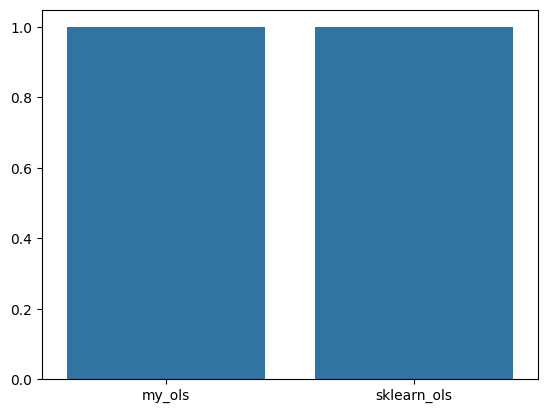

my_ols: 0.9984263636823413
sklearn_ols: 0.9984263636823413


In [10]:
# OLS

from sklearn.linear_model import LinearRegression
from models.linear_regression import OLS

my_ols = train_evaluate(OLS())
sklearn_ols = train_evaluate(LinearRegression())

sns.barplot(x=["my_ols", "sklearn_ols"], y=[my_ols, sklearn_ols])
plt.show()

print(f"my_ols: {my_ols}")
print(f"sklearn_ols: {sklearn_ols}")

In [11]:
# Batch Gradian decent and Mini Batch

from models.linear_regression import BatchGD, MiniBatchGD

my_batch_gd = train_evaluate(BatchGD(lr=0.1, max_itr=100))
my_mini_batch_gd = train_evaluate(MiniBatchGD())
print(f"my_batch_gradiant_decent R2_score: {my_batch_gd}")
print(f"my_mini_batch_gradiant_decent R2_score: {my_mini_batch_gd}")

my_batch_gradiant_decent R2_score: 0.9984263636459143
my_mini_batch_gradiant_decent R2_score: 0.9984261405713728


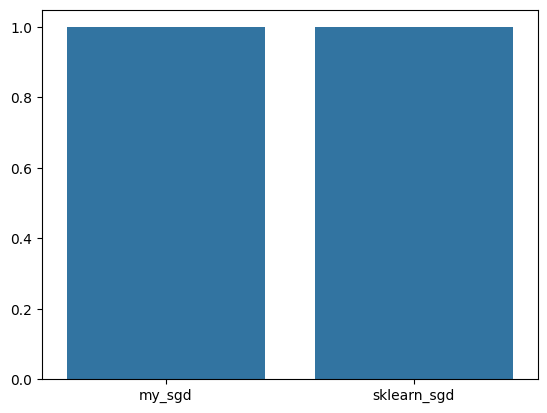

my Stochastic Gradient Descent R2_score: 0.9982691677415212
sklearn Stochastic Gradient Descent R2_score: 0.9984233978052746


In [12]:
# Stochastic Gradient

from sklearn.linear_model import SGDRegressor
from models.linear_regression import SGD

my_sgd = train_evaluate(SGD())
sklean_sgd = train_evaluate(SGDRegressor())

sns.barplot(x=["my_sgd", "sklearn_sgd"], y=[my_sgd, sklean_sgd])
plt.show()

print(f"my Stochastic Gradient Descent R2_score: {my_sgd}")
print(f"sklearn Stochastic Gradient Descent R2_score: {sklean_sgd}")

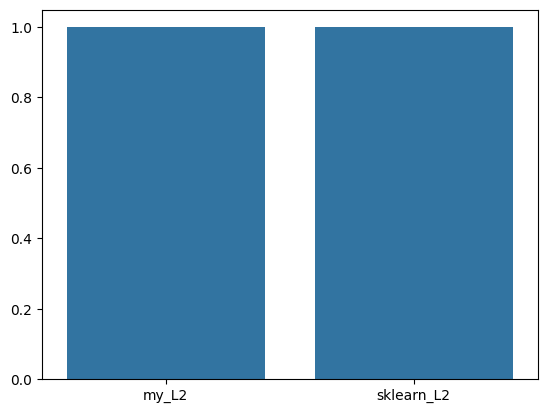

my_L2 (Ridge) R2_score: 0.9982155874748235
sklearn_L2 (Ridge) R2_score: 0.9984262171743145


In [13]:
# L2 Regulaization

from sklearn.linear_model import Ridge
from models.regularization import L2

my_L2 = train_evaluate(L2(alpha=0.01))
sklean_L2 = train_evaluate(Ridge(alpha=0.01))

sns.barplot(x=["my_L2", "sklearn_L2"], y=[my_L2, sklean_L2])
plt.show()

print(f"my_L2 (Ridge) R2_score: {my_L2}")
print(f"sklearn_L2 (Ridge) R2_score: {sklean_L2}")

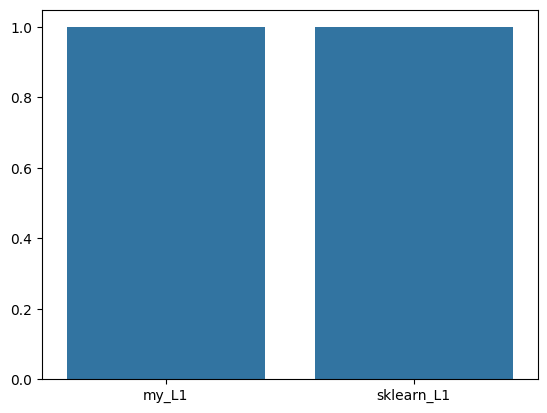

my_L1 (Lasso) R2_score: 0.9984247261298504
sklearn_L1 (Lasso) R2_score: 0.9984263363831538


In [14]:
# L1 Regularization

from sklearn.linear_model import Lasso
from models.regularization import L1

my_L1 = train_evaluate(L1())
sklean_L1 = train_evaluate(Lasso())

sns.barplot(x=["my_L1", "sklearn_L1"], y=[my_L1, sklean_L1])
plt.show()

print(f"my_L1 (Lasso) R2_score: {my_L1}")
print(f"sklearn_L1 (Lasso) R2_score: {sklean_L1}")

In [15]:
from encoding import OneHotEncoding

data = {'color': ['red', 'green', 'blue', 'red', 'green'],
        'size': ['small', 'medium', 'large', 'small', 'medium'],
        'price': [10, 15, 20, 12, 18]}
df_sample = pd.DataFrame(data)


encoder = OneHotEncoding()
encoded_df = encoder.fit_transform(df_sample)
encoded_df

,price,color_red,color_green,color_blue,size_small,size_medium,size_large
0,10,1,0,0,1,0,0
1,15,0,1,0,0,1,0
2,20,0,0,1,0,0,1
3,12,1,0,0,1,0,0
4,18,0,1,0,0,1,0


In [16]:
from encoding import LabelEncoding

encoder = LabelEncoding()
encoded_df = encoder.fit_transform(df_sample)
encoded_df

,color,size,price
0,0,0,10
1,1,1,15
2,2,2,20
3,0,0,12
4,1,1,18


In [17]:
# Standardization

from models.scaling import StandardScaler

np.random.seed(42)
num_samples = 100
data = {
    'feature1': np.random.rand(num_samples),
    'feature2': np.random.randint(0, 10, num_samples),
    'feature3': np.random.randn(num_samples)
}
df_generated = pd.DataFrame(data)
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_generated)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_generated.columns)

df_scaled.head()

,feature1,feature2,feature3
0,-0.323112,0.633735,0.266301
1,1.623434,-1.455501,-1.361484
2,0.884509,-0.410883,-0.951094
3,0.434049,-0.410883,0.794958
4,-1.061365,-0.062677,-1.625073


In [20]:
from models.scaling import MinMaxScaler

np.random.seed(42)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_generated)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_generated.columns)

df_scaled.head()

,feature1,feature2,feature3
0,0.376025,0.666667,0.469166
1,0.963140,0.000000,0.162588
2,0.740267,0.333333,0.239881
3,0.604399,0.333333,0.568733
4,0.153354,0.444444,0.112943
